#  Introduction To Text Classification


Text classification is a fundamental task in data analysis and natural language processing (NLP) that involves categorizing text documents into predefined classes or categories.

It's used in a wide range of applications such as spam detection, sentiment analysis, topic classification, and language identification.

The process of text classification typically involves the following steps:

1.Data Preprocessing: This step involves cleaning and preparing the text data for analysis. It may include removing punctuation, converting text to lowercase, and removing stopwords (commonly used words that do not carry much meaning).

2.Feature Extraction: In this step, the text data is converted into numerical feature vectors that can be used as input to machine learning algorithms. Common techniques for feature extraction in text classification include bag-of-words, TF-IDF (Term Frequency-Inverse Document Frequency), and word embeddings like Word2Vec or GloVe.

3.Model Selection: Once the features are extracted, a machine learning model is selected and trained on the labeled data. Popular models for text classification include Naive Bayes, Logistic Regression, Support Vector Machines (SVM), and more recently, deep learning models like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).

4.Model Evaluation: After training the model, it is evaluated on a separate test dataset to assess its performance. Common evaluation metrics for text classification include accuracy, precision, recall, and F1-score.

5.Deployment and Monitoring: Once the model is trained and evaluated, it can be deployed to classify new unseen text data. It's important to monitor the model's performance over time and retrain it if necessary to maintain its accuracy.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#1
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

#2 Support Vestor Machine Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#3 Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#4 Navive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#5 XGBoost Model
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns










# Importing csv file


In [3]:
df = pd.read_csv('Emotions_training.csv', encoding= 'unicode_escape')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Getting the info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


# Viewing the coloums present in dataset

In [17]:
df.columns

Index(['text', 'label'], dtype='object')

# Displaying the present rows and coloums in dataset

In [6]:
df.shape


(16000, 2)

# Describing() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)


In [19]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


# Data Preprocessing

# 1.Fixing Datatype(text column)


In [14]:
string_colms = {'text': 'string',}
df = df.astype(string_colms)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  string
 1   label   16000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 250.1 KB


# Checking for null values if any present


In [15]:
pd.isnull(df).sum()


text     0
label    0
dtype: int64

# Droping the null values


In [16]:
df.dropna(inplace=True)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Reviewing the content's present in "text" column


In [20]:
df['text'].unique()


<StringArray>
[                                                                                                                                     'i didnt feel humiliated',
                                                 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
                                                                                                             'im grabbing a minute to post i feel greedy wrong',
                                                                 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
                                                                                                                                         'i am feeling grouchy',
                                                                                            'ive been feeling a little burdened lately wasnt sure why that was',
                    

# Converting the  content of "text " column into lower case format

In [3]:
df['text'] = df['text'].str.lower()
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the commas(,) from the "text"column 
 

In [22]:
df['text'] = df['text'].str.replace(',', '')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the new lines using regex from the "text"coloum 


In [23]:
df['text'] = df['text'].replace('\n', '', regex=True)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the links from the "text"coloum 


In [24]:
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df['text'] = df['text'].astype('string')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the alpha numeric words from the "text"coloum 


In [26]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
df['text'] = df['text'].astype('string')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing words containing number 


In [11]:
def remove_words_with_numbers(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

# Applying the remove_words_with_numbers function to the content column
df['text'] = df['text'].apply(remove_words_with_numbers)

df.head(10)

,text,label
0,i didnt feel humili,0
1,i can go from feel so hopeless to so damn hope...,0
2,im grab a minut to post i feel greedi wrong,3
3,i am ever feel nostalg about the fireplac i wi...,2
4,i am feel grouchi,3
5,ive been feel a littl burden late wasnt sure w...,0
6,ive been take or milligram or time recommend a...,5
7,i feel as confu about life as a teenag or as j...,4
8,i have been with petrona for year i feel that ...,1
9,i feel romant too,2


# Removing extra spaces from the "text"coloum 


In [27]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.strip().split()))
df['text'] = df['text'].astype('string')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing special charecters from the "text"coloum 


In [28]:
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing Stopwords from the "text"coloum 


In [29]:
from nltk.corpus import stopwords
", ".join (stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [30]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Applying the function to the content column
df['text'] = df['text'].apply(remove_stopwords)
print(df['text'])

0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic still waiting tables sub...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: text, Length: 16000, dtype: object


# Stemming

In [10]:
porter = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Applying the function to the text column
df['text'] = df['text'].apply(stem_text)
df.head(10)

,text,label
0,i didnt feel humili,0
1,i can go from feel so hopeless to so damn hope...,0
2,im grab a minut to post i feel greedi wrong,3
3,i am ever feel nostalg about the fireplac i wi...,2
4,i am feel grouchi,3
5,ive been feel a littl burden late wasnt sure w...,0
6,ive been take or milligram or time recommend a...,5
7,i feel as confu about life as a teenag or as j...,4
8,i have been with petrona for year i feel that ...,1
9,i feel romant too,2


# Lemmatization
 

In [8]:
def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract lemmatized tokens
    lemmatized_tokens = [token.lemma_ for token in doc]
    # Join the lemmatized tokens into a sentence
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
df.head(10)

,text,label
0,i didnt feel humili,0
1,i can go from feel so hopeless to so damn hope...,0
2,im grab a minut to post i feel greedi wrong,3
3,i am ever feel nostalg about the fireplac i wi...,2
4,i am feel grouchi,3
5,ive been feel a littl burden late wasnt sure w...,0
6,ive been take or milligram or time recommend a...,5
7,i feel as confu about life as a teenag or as j...,4
8,i have been with petrona for year i feel that ...,1
9,i feel romant too,2


In [35]:
df.sample(5)

,text,label
9672,feeling devastated inner voice within thats na...,0
7034,attended free individual academic consultation...,0
10821,get feeling facebook looking ways get popular,1
12699,could feel stress leaving veins getting wonderful,1
9899,feel world tragic woeful place live,0


# Feature Extraction/Engineering

Feature extraction in data analysis is the process of transforming raw data into a format that is suitable for machine learning algorithms. 

It involves selecting, combining, and transforming the original features (variables) of a dataset to create new, more informative features that can improve the performance of a machine learning model.

Feature extraction is important because it helps to:

1.Reduce dimensionality
2.Improve model performance
3.Deal with sparse or noisy data
4.Enable transfer learning
5.Interpretability

Common techniques for feature extraction include:

1.Principal Component Analysis (PCA): A dimensionality reduction technique that identifies the most important features in the data.

2.Feature scaling: Scaling features to a similar range can improve the performance of some machine learning algorithms.

3.Feature selection: Selecting a subset of the most important features based on statistical tests or machine learning models.

4.Text feature extraction: Techniques like TF-IDF, word embeddings, and topic modeling can be used to extract features from text data.

5.Image feature extraction: Techniques like edge detection, corner detection, and texture analysis can be used to extract features from images.



# Converting the text  data into TF-IDF matrix.

In [40]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger' , 'fear' , 'surprise'],
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)


# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Displaying the TF-IDF matrix
print(tfidf_matrix.toarray())

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


# Performing feature scaling on"label" column of the dataset using StandardScaler



In [44]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
    'numerical_feature': [10, 20, 30, 40, 50, 60],  # Example numerical feature
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Selecting numerical columns for feature scaling
numerical_cols = ['numerical_feature']

# Creating StandardScaler object
scaler = StandardScaler()

# Fit-transform the numerical data
scaled_numerical_data = scaler.fit_transform(df[numerical_cols])

# Replacing original numerical columns with scaled data
df[numerical_cols] = scaled_numerical_data

# Displaying the DataFrame with scaled numerical data
df.head()


,text,numerical_feature,label
0,sadness,-1.46385,0
1,joy,-0.87831,1
2,love,-0.29277,2
3,anger,0.29277,3
4,fear,0.87831,4


# Selecting the top k features based on ANOVA F-values using feature selection



In [46]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
    'numerical_feature1': [10, 20, 30, 40, 50, 60],  # Example numerical feature 1
    'numerical_feature2': [4, 5, 6, 7, 8, 9],      # Example numerical feature 2
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Converting text column into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Combineing TF-IDF matrix with numerical features
X = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), df[['numerical_feature1', 'numerical_feature2']]], axis=1)
y = df['label']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Display the selected features
print(selected_features)

Index(['numerical_feature1', 'numerical_feature2'], dtype='object')


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Performing Principal Component Analysis (PCA) on text data 

In [45]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
    'numerical_feature1': [10, 20, 30, 40, 50, 60],  # Example numerical feature 1
    'numerical_feature2': [4, 5, 6, 7, 8, 9],      # Example numerical feature 2
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Convert text column into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Combine TF-IDF matrix with numerical features
X = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), df[['numerical_feature1', 'numerical_feature2']]], axis=1)
y = df['label']

# Performing  PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# Creating a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Concatenate the label column
df_pca['label'] = y

# Displaying the DataFrame with PCA results
df.head()


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,text,numerical_feature1,numerical_feature2,label
0,sadness,10,4,0
1,joy,20,5,1
2,love,30,6,2
3,anger,40,7,3
4,fear,50,8,4


# Converting the "text" column of dataset into a matrix of word counts. 

In [5]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger' , 'fear' , 'surprise'],
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Creating an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

# Geting the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Converting the sparse matrix to a dense matrix
X_dense = X.todense()

# Converting the dense matrix to a DataFrame
df_tfidf = pd.DataFrame(X_dense, columns=feature_names)

# Print the TF-IDF matrix
print(df_tfidf.head())


   anger  fear  joy  love  sadness  surprise
0    0.0   0.0  0.0   0.0      1.0       0.0
1    0.0   0.0  1.0   0.0      0.0       0.0
2    0.0   0.0  0.0   1.0      0.0       0.0
3    1.0   0.0  0.0   0.0      0.0       0.0
4    0.0   1.0  0.0   0.0      0.0       0.0


# Model Building / Selection

Model selection or building in data analysis refers to the process of selecting the best model or algorithm to use for a given dataset and problem. 

It involves evaluating different models, tuning their hyperparameters, and selecting the one that performs best according to predefined criteria (e.g, accuracy, precision, recall, etc.)

The process typically includes the following steps:

1.Define the Problem
, 2.Data Preparation
, 3.Model Selection
, 4.Hyperparameter Tuning
, 5.Model Evaluation
, 6.Final Model Training
, 7.Model Testing
, 8.Model Deployment

Model selection is crucial in data analysis as it directly impacts the performance and effectiveness of your analysis. 
A well-selected model can provide more accurate predictions and insights, leading to better decision-making.


# 1.Dividing the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.


In [33]:

# Spliting the data into features (X) and labels (y)
X = data['text']
y = data['label']

# Spliting the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Creating train, test, and validation datasets
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})
val_data = pd.DataFrame({'text': X_val, 'label': y_val})

# Print the shapes of the datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)

#(We split the data into features (X) and labels (y) using X = data['text'] and y = data['label'].)
#(We use the train_test_split function to split the data into train and temporary sets (70% train, 30% temp) using X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42).
#(We further split the temporary set into validation and test sets (40% validation, 60% test) using X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42).
#(We create separate DataFrames for train, test, and validation datasets using train_data = pd.DataFrame({'text': X_train, 'label': y_train}), test_data = pd.DataFrame({'text': X_test, 'label': y_test}), and val_data = pd.DataFrame({'text': X_val, 'label': y_val}).
#(Finally, we print the shapes of the train, test, and validation datasets using)

Train data shape: (11200, 2)
Test data shape: (1920, 2)
Validation data shape: (2880, 2)


# 2.Building Classification Models

Classification models are a type of machine learning model used to predict categorical labels or classes based on input features.These models are used in data analysis to classify data points into different categories or classes.

Some common classification models include:
1.Logistic Regression, 2.Decision Trees, 3.Random Forest, 4.Support Vector Machines (SVM), 5.Gradient Boosting Machines (e.g., XGBoost, LightGBM), 6.Naive Bayes, 7.K-Nearest Neighbors (KNN), 8.Decision Tree

# 1.Logistic Regression Model

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1 .

Logistic Function / Sigmoid Function

1.The sigmoid function is a mathematical function used to map the predicted values to probabilities.
2.It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the “S” form.
3.The S-form curve is called the Sigmoid function or the logistic function.
4.In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

Basically their are three types of Logistic Regression:-
1.Binomial
2.Multinomial
3.Ordinal

*Logistic regression is a widely used supervised machine learning algorithm for classification problems. It is a statistical model that aims to predict the probability of a binary or categorical outcome based on one or more independent variables.

In machine learning, logistic regression is used to model the relationship between the input features and the target variable, which can take one of two values (in the case of binary classification) or multiple values (in the case of multinomial classification).


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.93
Testing Accuracy: 0.83
Classification Report (Training Data):
              precision    recall  f1-score   support

     sadness       0.94      0.98      0.96      3232
         joy       0.89      0.98      0.94      3781
        love       0.97      0.74      0.84       870
       anger       0.96      0.90      0.93      1552
        fear       0.95      0.89      0.92      1371
    surprise       0.96      0.62      0.75       394

    accuracy                           0.93     11200
   macro avg       0.95      0.85      0.89     11200
weighted avg       0.93      0.93      0.93     11200


Confusion Matrix (Training Data):
[[3169   42    0   15    5    1]
 [  30 3720   16    5    6    4]
 [  17  203  645    4    1    0]
 [  74   71    1 1397    9    0]
 [  61   60    0   23 1222    5]
 [  29   73    1    4   43  244]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

     sadness       0.87      0.93      0.90

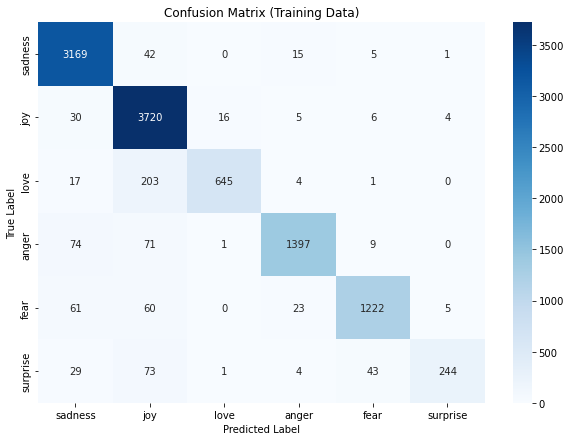

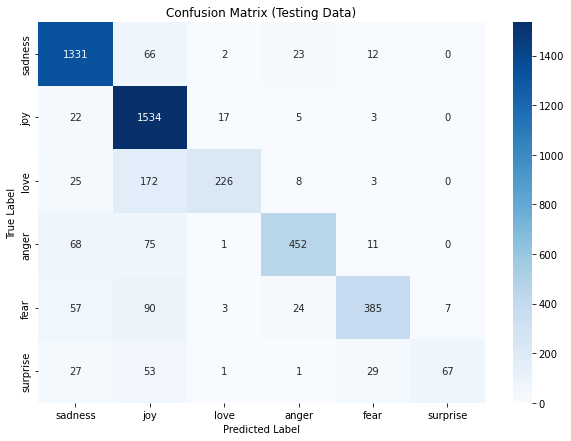

In [4]:
# Loading the dataset
data = pd.read_csv('Emotions_training.csv')

# Spliting the data into features (X) and labels (y)
X = data['text']
y = data['label']

# Spliting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transforming the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Defining emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
        
# Creating a LogisticRegression instance
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train_vectorized, y_train)

# Making predictions on the training data
y_train_pred = lr_model.predict(X_train_vectorized)

# Making predictions on the testing data
y_test_pred = lr_model.predict(X_test_vectorized)





# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculating testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")




# Generating classification report for training data
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for training data
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))

# Generating classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))






#Generating Confusion Matrix for both traning and testing dataset using "HeatMap" function.

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for training data as a heatmap
plot_confusion_matrix(y_train, y_train_pred, list(emotion_mapping.values()), "Confusion Matrix (Training Data)")

# Plot confusion matrix for testing data as a heatmap
plot_confusion_matrix(y_test, y_test_pred, list(emotion_mapping.values()), "Confusion Matrix (Testing Data)")


#Explantion

#1.Firstly the CSV file Emotions_training.csv is loaded into a pandas DataFrame named data.

#2.Then the DataFrame data is splited into features X (the 'text' column) and labels y (the 'label' column).

#3.After which The data is further split into training and testing sets using train_test_split. 70% of the data is used for training and 30% for testing, with a fixed random state for reproducibility.

#4.Then we initialized a TfidfVectorizer instance named vectorizer, which will be used to convert text data into TF-IDF feature vectors.

#5.In next step the fit_transform method is applied to the training data X_train, fitting the vectorizer to the data and transforming it into TF-IDF vectors.

#6.Then the transform method is used on the testing data X_test to convert it into TF-IDF vectors based on the vocabulary learned from the training data.

#7.Then we map numerical labels to their corresponding emotion names for easier interpretation of results.

#8.A LogisticRegression model instance named lr_model is created.

#9.The logistic regression model is trained using the training data (X_train_vectorized and y_train).

#10.Then the trained model is used to predict labels for the training and Testing data.

#11.After which we caluculated the training and testing accuracy  using accuracy_score and printed.

#12.Then we generated classification report for the training and testing  data is generated using classification_report and printed. It includes metrics such as precision, recall, and F1-score for each emotion.

#13.A confusion matrix for the training  and Tesyting data is generated using confusion_matrix and printed. It shows the counts of true vs. predicted labels.

#14.Then we plot a confusion matrix as a heatmap using seaborn. It takes true labels, predicted labels, class names, and a title as inputs.

#15.Lastly the confusion matrix for the training  and testing data is plotted as a heatmap.






# Performing HyperParameter Tuning on Logistic Regression Model Using GridSearchCV

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarn

Best Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Classification Report (Training Data):
              precision    recall  f1-score   support

     sadness       1.00      1.00      1.00      3232
         joy       1.00      1.00      1.00      3781
        love       0.99      0.99      0.99       870
       anger       1.00      1.00      1.00      1552
        fear       0.99      1.00      0.99      1371
    surprise       0.99      0.98      0.99       394

    accuracy                           1.00     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       1.00      1.00      1.00     11200


Confusion Matrix (Training Data):
[[3226    1    0    4    1    0]
 [   1 3769    8    0    2    1]
 [   0    7  863    0    0    0]
 [   3    0    0 1548    1    0]
 [   2    0    0    1 1365    3]
 [   0    1    0    0    5  388]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

     sadness       0.94      0.93      0.94      1434
         joy       0.89      0.94  

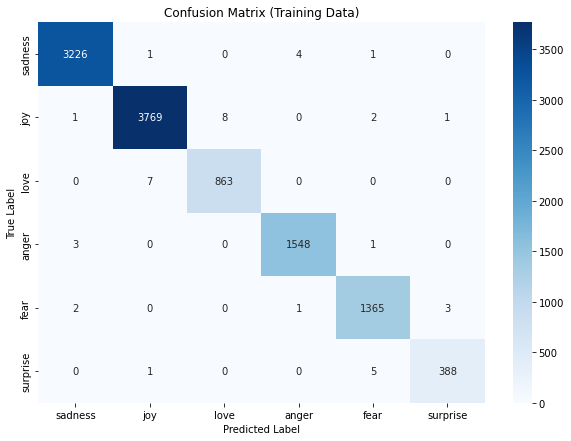

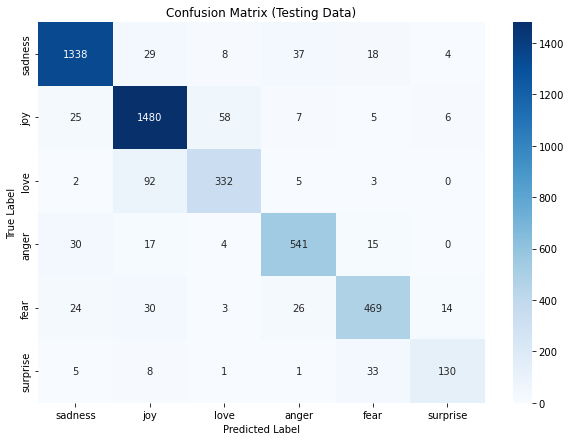

In [4]:
# Loading the dataset
data = pd.read_csv('Emotions_training.csv')

# Splitting the data into features (X) and labels (y)
X = data['text']
y = data['label']

# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transforming the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Defining emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Creating a LogisticRegression instance
lr_model = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Penalty type (L1 or L2 regularization)
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting  the best model(The best_model is an instance of the LogisticRegression model with the optimal hyperparameters found by the grid search.)
best_model = grid_search.best_estimator_

# Training the best model
best_model.fit(X_train_vectorized, y_train)

# Making predictions on the training data
y_train_pred = best_model.predict(X_train_vectorized)

# Making predictions on the testing data
y_test_pred = best_model.predict(X_test_vectorized)

# Generating classification report for training data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for training data
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))

# Generating classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))


#Generating Confusion Matrix for both traning and testing dataset using "HeatMap" function.

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for training data as a heatmap
plot_confusion_matrix(y_train, y_train_pred, list(emotion_mapping.values()), "Confusion Matrix (Training Data)")

# Plot confusion matrix for testing data as a heatmap
plot_confusion_matrix(y_test, y_test_pred, list(emotion_mapping.values()), "Confusion Matrix (Testing Data)")


# 1.Here we use GridSearchCV to perform a grid search over the specified hyperparameters: 'penalty', 'C', and 'solver'. 
# 2.The GridSearchCV object is created with the LogisticRegression model and the parameter grid param_grid. 
# 3.We use 5-fold cross-validation (cv=5) and set the scoring metric to 'accuracy'.
# 4.After fitting the GridSearchCV object to the training data, we print the best hyperparameters found by the grid search (grid_search.best_params_). 
# 5.We then get the best model instance (best_model = grid_search.best_estimator_) and fit it to the training data.
# 6.Next, we make predictions on both the training and test data using the best model. 
# 7.Finally, we generate the classification report and confusion matrix for both the training and test datasets using the classification_report and confusion_matrix functions from sklearn.metrics.
# 8.The output include's the best hyperparameters found by the grid search, followed by the classification report and confusion matrix for both the training and test datasets.


# Resuts:-
# The best hyperparameters found by the grid search are:

#  'penalty': 'l1' (L1 regularization)
#  'C': 10.0 (Inverse of regularization strength)
#  'solver':'saga' (Algorithm to use for optimization)



# 2. Support Vector Machine (SVM) Model

Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression.

Training Accuracy: 0.9916071428571429
Testing Accuracy: 0.8160416666666667
Predicted Emotions: ['sadness', 'joy', 'sadness', 'joy', 'sadness', 'sadness', 'fear', 'sadness', 'joy', 'joy', 'sadness', 'anger', 'joy', 'sadness', 'sadness', 'fear', 'anger', 'joy', 'love', 'sadness', 'anger', 'joy', 'sadness', 'sadness', 'sadness', 'love', 'joy', 'sadness', 'sadness', 'joy', 'joy', 'joy', 'love', 'joy', 'love', 'sadness', 'sadness', 'fear', 'joy', 'joy', 'joy', 'sadness', 'joy', 'sadness', 'anger', 'sadness', 'anger', 'joy', 'sadness', 'sadness', 'anger', 'fear', 'joy', 'joy', 'sadness', 'anger', 'sadness', 'joy', 'love', 'joy', 'fear', 'joy', 'joy', 'joy', 'anger', 'joy', 'sadness', 'anger', 'sadness', 'anger', 'sadness', 'sadness', 'anger', 'fear', 'sadness', 'sadness', 'joy', 'joy', 'anger', 'sadness', 'fear', 'joy', 'sadness', 'sadness', 'surprise', 'joy', 'fear', 'sadness', 'sadness', 'love', 'love', 'fear', 'sadness', 'joy', 'sadness', 'sadness', 'fear', 'joy', 'love', 'joy', 'joy', 'l

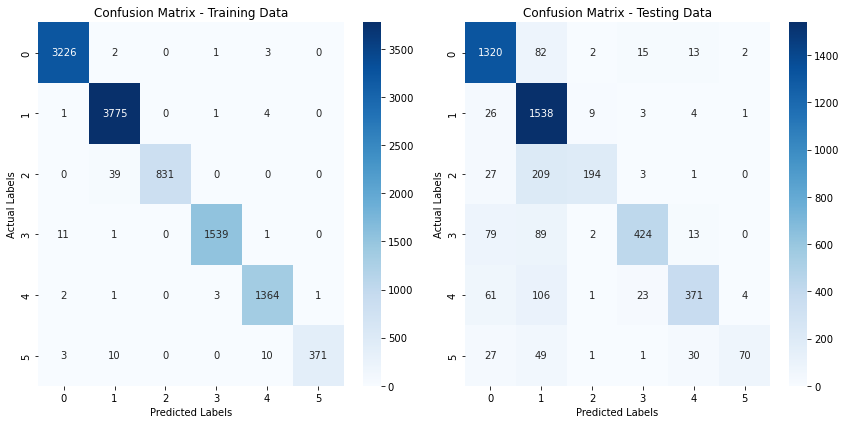

In [7]:
X = df['text']
y = df['label']

# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build the SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict the labels for the training set
y_pred_train = svm_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test = svm_model.predict(X_test_tfidf)

# Calculating the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

# Calculating the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

# Generate the mapping of labels to emotions
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Convert the predicted labels to emotions
predicted_emotions = [emotion_mapping[label] for label in y_pred_test]

# Print the predicted emotions
print("Predicted Emotions:", predicted_emotions)

# Generating classification report and confusion matrix for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix - Training Data:")
print(confusion_matrix(y_train, y_pred_train))

# Generating classification report and confusion matrix for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix - Testing Data:")
print(confusion_matrix(y_test, y_pred_test))



#Generating Confusion Matrix for both traning and testing dataset using "HeatMap" function.

# Generate the confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrices using heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.tight_layout()
plt.show()

#Explantion

#1.Here we firstly  extracts the 'text' column from the DataFrame df and assigns it to X as the feature set.
#It extracts the 'label' column and assigns it to y as the target variable.

#2.Then the The dataset is splited into training and testing sets. 70% of the data is used for training and 30% for testing. The random_state parameter ensures reproducibility.

#3.Then a TfidfVectorizer instance named tfidf_vectorizer is created to convert text data into TF-IDF feature vectors.
#fit_transform is applied to X_train to learn the vocabulary from the training data and transform the training data into TF-IDF vectors.
#transform is applied to X_test to transform the testing data into TF-IDF vectors using the vocabulary learned from the training data.

#4.Then we created an SVM model instance svm_model is created using the SVC class.
#The model is trained on the TF-IDF transformed training data (X_train_tfidf and y_train).

#5.Nextly the trained SVM model is used to predict the labels for the training and testing set.

#6.Then the  training and testing  accuracy is calculated using accuracy_score by comparing the true labels (y_train) and the predicted labels (y_pred_train).
#And the training and testing  accuracy is printed.

#7.Then we map numerical labels to their corresponding emotion names for easier interpretation of results.

#8.After which the predicted labels for the testing set (y_pred_test) are converted to their corresponding emotion names using the emotion_mapping dictionary.
#The result is a list of predicted emotions named predicted_emotions.

#9.The list of predicted emotions is printed.

#10.Then a classification report for the training and testing  data is generated and printed. This report includes precision, recall, F1-score, and support for each class.
#Along with confusion matrix for the training and testing data is generated and printed. This matrix shows the counts of true vs. predicted labels.

#11.The confusion matrices for the training and testing data are generated and stored in cm_train and cm_test, respectively.

#12.A new figure is created with a specified size of 12x6 inches.

#13.The subplot for the training and testing  data confusion matrix is created.
#The confusion matrix cm_train and cm_test is plotted as a heatmap using seaborn, with annotations showing the counts, formatted as integers (fmt='d'), and using the 'Blues' color map.
#Titles and labels for the x-axis and y-axis are added.

#14.Finally tight_layout is used to adjust the subplots to fit into the figure area.The plot is displayed.




# Performing HyperParameter Tuning on Support Vector Machine (SVM) Model Using GridSearchCV

Best Parameters: {'C': 10, 'gamma': 0.1}

Classification Report - Training Data (Best Model):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3232
           1       0.99      0.99      0.99      3781
           2       0.98      0.96      0.97       870
           3       0.99      0.99      0.99      1552
           4       0.99      0.99      0.99      1371
           5       0.98      0.97      0.97       394

    accuracy                           0.99     11200
   macro avg       0.99      0.98      0.98     11200
weighted avg       0.99      0.99      0.99     11200

Confusion Matrix - Training Data (Best Model):
[[3210    3    1   12    5    1]
 [  12 3744   15    3    5    2]
 [   0   32  838    0    0    0]
 [  16    2    0 1531    3    0]
 [   5    1    0    6 1354    5]
 [   2    3    0    0    7  382]]

Classification Report - Testing Data (Best Model):
              precision    recall  f1-score   support

          

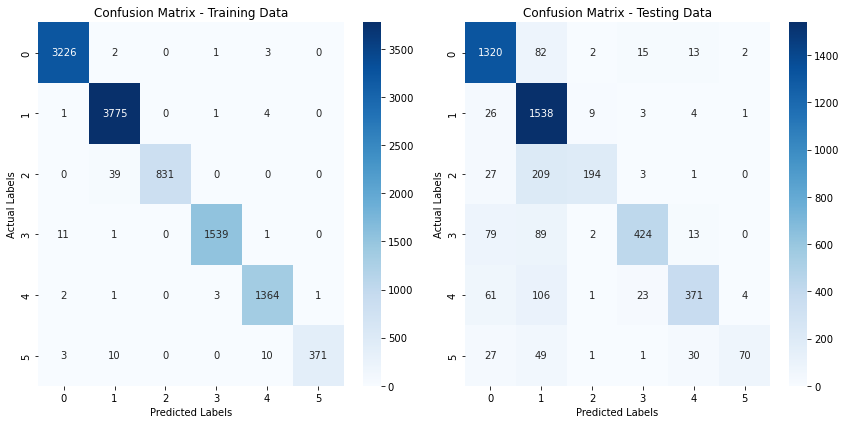

In [4]:
X = df['text']
y = df['label']

# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build the SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict the labels for the training set
y_pred_train = svm_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test = svm_model.predict(X_test_tfidf)





# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=3)

# Perform the grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Build the SVM model with the best parameters
best_svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_tfidf, y_train)

# Predict the labels for the training set
y_pred_train_best = best_svm_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test_best = best_svm_model.predict(X_test_tfidf)

# Generating classification report and confusion matrix for training data with best model
print("\nClassification Report - Training Data (Best Model):")
print(classification_report(y_train, y_pred_train_best))
print("Confusion Matrix - Training Data (Best Model):")
print(confusion_matrix(y_train, y_pred_train_best))

# Generating classification report and confusion matrix for testing data with best model
print("\nClassification Report - Testing Data (Best Model):")
print(classification_report(y_test, y_pred_test_best))
print("Confusion Matrix - Testing Data (Best Model):")
print(confusion_matrix(y_test, y_pred_test_best))


# Generate the confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrices using heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.tight_layout()
plt.show()




# 3.Random Forest Model

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance. In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

Training Accuracy: 0.9983928571428572
Testing Accuracy: 0.8496875

Classification Report - Training Data:
              precision    recall  f1-score   support

     sadness       1.00      1.00      1.00      3232
         joy       1.00      1.00      1.00      3781
        love       0.99      0.99      0.99       870
       anger       1.00      1.00      1.00      1552
        fear       1.00      1.00      1.00      1371
    surprise       0.99      0.99      0.99       394

    accuracy                           1.00     11200
   macro avg       1.00      1.00      1.00     11200
weighted avg       1.00      1.00      1.00     11200

Confusion Matrix - Training Data:
[[3231    0    0    1    0    0]
 [   0 3776    5    0    0    0]
 [   0    5  865    0    0    0]
 [   2    0    0 1550    0    0]
 [   0    0    0    0 1368    3]
 [   0    0    0    0    2  392]]

Classification Report - Testing Data:
              precision    recall  f1-score   support

     sadness       0.91 

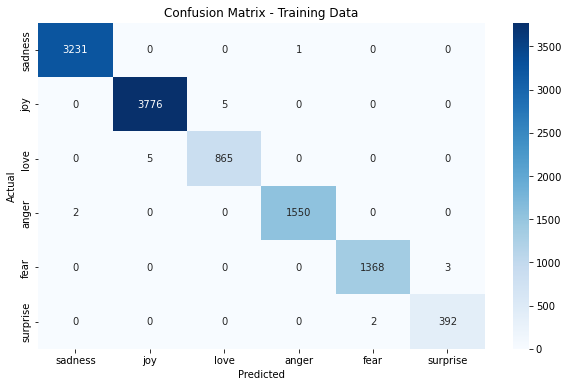

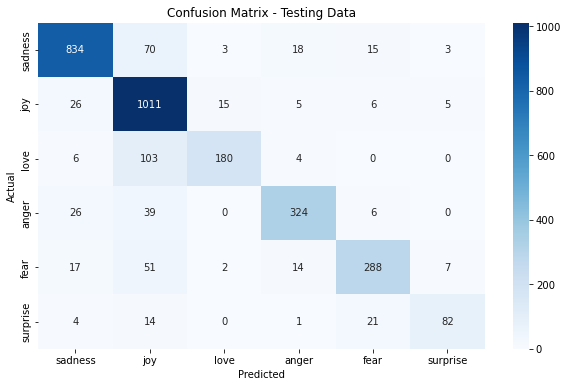

In [6]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Define the emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Split the dataset into train (70%), test (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict the labels for the training set
y_pred_train = rf_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test = rf_model.predict(X_test_tfidf)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

# Calculate the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

# Generate the classification report and confusion matrix for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_pred_train, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Training Data:")
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print(conf_matrix_train)

# Generate the classification report and confusion matrix for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_pred_test, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Testing Data:")
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(conf_matrix_test)

# Plot the confusion matrix for training data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for testing data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Performing HyperParameter Tuning on Random Forest Model Using GridSearchCV

Training Accuracy: 0.9233035714285714
Testing Accuracy: 0.854375

Classification Report - Training Data:
              precision    recall  f1-score   support

     sadness       0.96      0.97      0.96      3232
         joy       0.89      0.98      0.93      3781
        love       0.96      0.73      0.83       870
       anger       0.95      0.89      0.92      1552
        fear       0.90      0.90      0.90      1371
    surprise       0.96      0.70      0.81       394

    accuracy                           0.92     11200
   macro avg       0.93      0.86      0.89     11200
weighted avg       0.93      0.92      0.92     11200

Confusion Matrix - Training Data:
[[3120   51   10   23   27    1]
 [  24 3700   13   15   21    8]
 [   4  225  632    4    4    1]
 [  61   97    2 1380   12    0]
 [  38   59    2   35 1235    2]
 [  11   36    0    1   72  274]]

Classification Report - Testing Data:
              precision    recall  f1-score   support

     sadness       0.92  

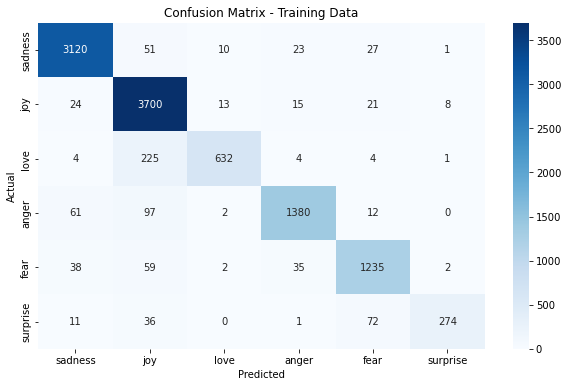

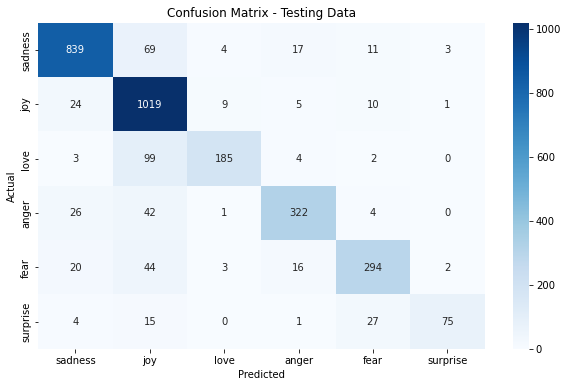

In [7]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Define the emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Split the dataset into train (70%), test (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform hyperparameter tuning using GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best model
best_params = rf_grid.best_params_
best_rf_model = rf_grid.best_estimator_

# Predict the labels for the training set
y_pred_train = best_rf_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test = best_rf_model.predict(X_test_tfidf)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

# Calculate the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

# Generate the classification report and confusion matrix for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_pred_train, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Training Data:")
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print(conf_matrix_train)

# Generate the classification report and confusion matrix for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_pred_test, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Testing Data:")
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(conf_matrix_test)

# Plot the confusion matrix for training data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for testing data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.Xgboost Model

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

XGBoost can be used in a variety of applications, including Kaggle competitions, recommendation systems, and click-through rate prediction, among others. It is also highly customizable and allows for fine-tuning of various model parameters to optimize performance.

Training Accuracy: 0.9677678571428572
Testing Accuracy: 0.8871875

Classification Report - Training Data:
              precision    recall  f1-score   support

     sadness       0.99      0.96      0.97      3232
         joy       0.94      0.99      0.96      3781
        love       0.96      0.97      0.97       870
       anger       0.99      0.94      0.96      1552
        fear       0.98      0.95      0.97      1371
    surprise       0.98      0.97      0.98       394

    accuracy                           0.97     11200
   macro avg       0.97      0.96      0.97     11200
weighted avg       0.97      0.97      0.97     11200

Confusion Matrix - Training Data:
[[3111   86    4   10   21    0]
 [   6 3736   32    1    5    1]
 [   0   25  845    0    0    0]
 [  25   71    0 1454    2    0]
 [   8   40    0    7 1309    7]
 [   1    5    0    0    4  384]]

Classification Report - Testing Data:
              precision    recall  f1-score   support

     sadness       0.95 

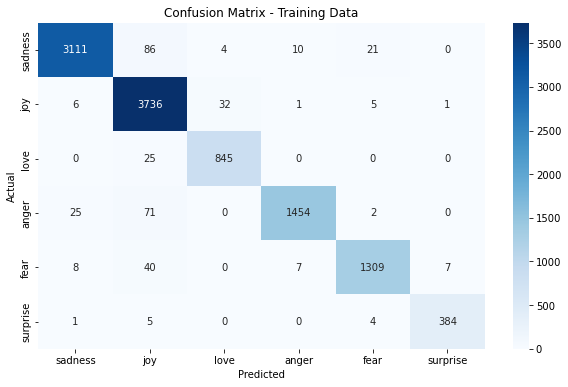

Text(69.0, 0.5, 'Actual')

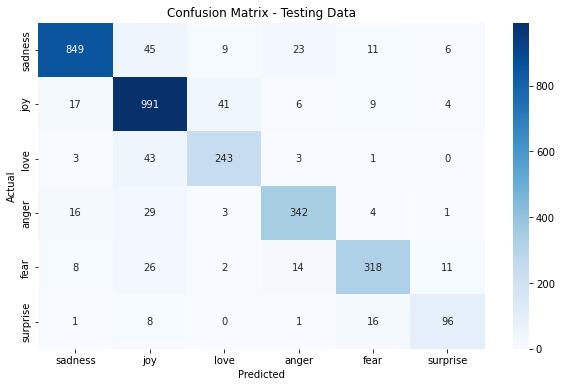

In [11]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Define the emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Split the dataset into train (70%), test (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Build the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Predict the labels for the training set
y_pred_train = xgb_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test = xgb_model.predict(X_test_tfidf)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

# Calculate the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

# Generate the classification report and confusion matrix for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_pred_train, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Training Data:")
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print(conf_matrix_train)

# Generate the classification report and confusion matrix for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_pred_test, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Testing Data:")
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(conf_matrix_test)

# Plot the confusion matrix for training data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for testing data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Explanation

#1.Firstly we used the read_csv function from the pandas library to load a CSV file named 'Emotions_training.csv' into a pandas DataFrame named df.

#2.Then we defines a dictionary emotion_mapping that maps the integer labels in the dataset to their corresponding emotion names.

#3.After that we splited the dataset into training, testing, and validation sets. The first line splits the data into a training set (70%) and a temporary set (30%) using the train_test_split function from scikit-learn. 
#The second line further splits the temporary set into a testing set (20% of the original data) and a validation set (10% of the original data).

#4.Then we created TF-IDF (Term Frequency-Inverse Document Frequency) vectors for the text data. The TfidfVectorizer is initialized, and then the fit_transform method is used to learn the vocabulary from the training data and create TF-IDF vectors for the training set. 
#The transform method is used to create TF-IDF vectors for the testing and validation sets using the learned vocabulary.

#5.After which define an XGBoost classifier model with a random state of 42 for reproducibility and fit the model to the training data using the fit method.

#6.We then use the predict method of the best XGBoost model to generate predictions for the training and testing sets, respectively.

#7.Then we calculated and printed the training and testing accuracies using the accuracy_score function from scikit-learn.

#8.Now we generated and printed the classification report and confusion matrix for the training data. 
#The classification report provides precision, recall, and F1-score metrics for each emotion class. 
#The confusion matrix shows the number of true positives, false positives, false negatives, and true negatives for each class.

#9.In this step the classification report and confusion matrix are generated and printed  for the testing data, similar to the training data.

#10.Finally we plot the confusion matrices for the training and testing data using the heatmap function from the seaborn library. 
#The confusion matrices are visualized as heatmaps, with the actual emotion classes on the y-axis and the predicted emotion classes on the x-axis. The color intensity represents the number of instances in each cell of the matrix. 
#The annotations show the actual values, and the emotion names are used as tick labels for better readability.




#  Performing HyperParameter Tuning on Xgboost  Model Using GridSearchCV

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   8.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   8.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   7.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  13.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  13.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  14.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=  14.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=  13.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=  13.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=  26.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=  26.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_est

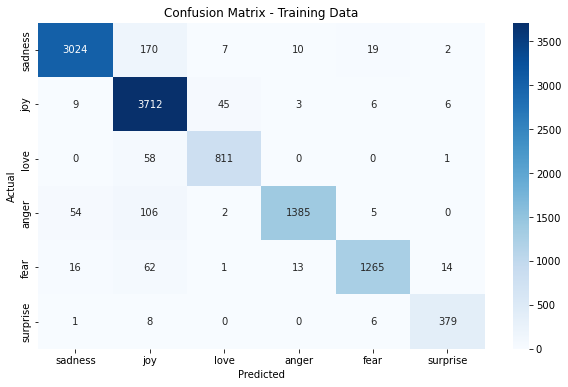

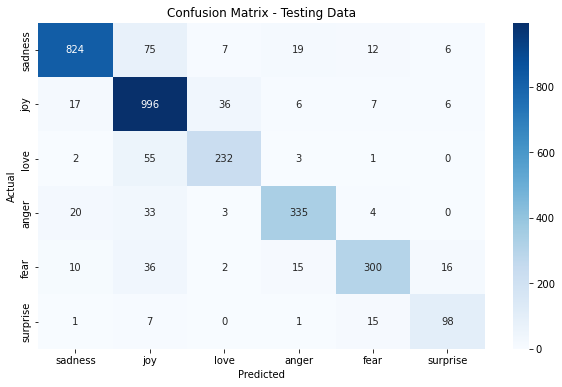

In [12]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Define the emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Split the dataset into train (70%), test (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Predict the labels for the training set
y_pred_train = best_xgb_model.predict(X_train_tfidf)

# Predict the labels for the testing set
y_pred_test = best_xgb_model.predict(X_test_tfidf)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", training_accuracy)

# Calculate the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

# Generate the classification report and confusion matrix for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_pred_train, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Training Data:")
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print(conf_matrix_train)

# Generate the classification report and confusion matrix for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_pred_test, target_names=[emotion_mapping[i] for i in range(6)]))
print("Confusion Matrix - Testing Data:")
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(conf_matrix_test)

# Plot the confusion matrix for training data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for testing data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_mapping[i] for i in range(6)], yticklabels=[emotion_mapping[i] for i in range(6)])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Explanation

#1.Firstly we used the read_csv function from the pandas library to load a CSV file named 'Emotions_training.csv' into a pandas DataFrame named df.

#2.Then we defines a dictionary emotion_mapping that maps the integer labels in the dataset to their corresponding emotion names.

#3.After that we splited the dataset into training, testing, and validation sets. The first line splits the data into a training set (70%) and a temporary set (30%) using the train_test_split function from scikit-learn. 
#The second line further splits the temporary set into a testing set (20% of the original data) and a validation set (10% of the original data).

#4.Then we created TF-IDF (Term Frequency-Inverse Document Frequency) vectors for the text data. The TfidfVectorizer is initialized, and then the fit_transform method is used to learn the vocabulary from the training data and create TF-IDF vectors for the training set. 
#The transform method is used to create TF-IDF vectors for the testing and validation sets using the learned vocabulary.

#5.After which we define an XGBoost classifier model with a random state of 42 for reproducibility.

#6.Along with that a dictionary is defined  param_grid that specifies the hyperparameters and their values to be explored during the grid search process.

#7.Then we performed  a grid search using the GridSearchCV function from scikit-learn. The XGBClassifier model, the hyperparameter grid, a 3-fold cross-validation, the accuracy scoring metric, and a verbose output level of 2 are specified. 

#The fit method is called on the grid search object with the training data to find the best combination of hyperparameters.

#8.Then we retrieves the best estimator (i.e., the model with the best hyperparameters) from the grid search object.

#9.We then use the predict method of the best XGBoost model to generate predictions for the training and testing sets, respectively.

#10. After that wecalculated and print the training and testing accuracies using the accuracy_score function from scikit-learn.

#11.Now we generated and printed the classification report and confusion matrix for the training data. 
#The classification report provides precision, recall, and F1-score metrics for each emotion class. 
#The confusion matrix shows the number of true positives, false positives, false negatives, and true negatives for each class.

#12.In this step the classification report and confusion matrix are generated and printed  for the testing data, similar to the training data.

#13.Finally we plot the confusion matrices for the training and testing data using the heatmap function from the seaborn library. 
#The confusion matrices are visualized as heatmaps, with the actual emotion classes on the y-axis and the predicted emotion classes on the x-axis. The color intensity represents the number of instances in each cell of the matrix. 
#The annotations show the actual values, and the emotion names are used as tick labels for better readability.





# Ploting bar graphs comparing precision, recall, and f1-score for each model across different emotion labels.

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


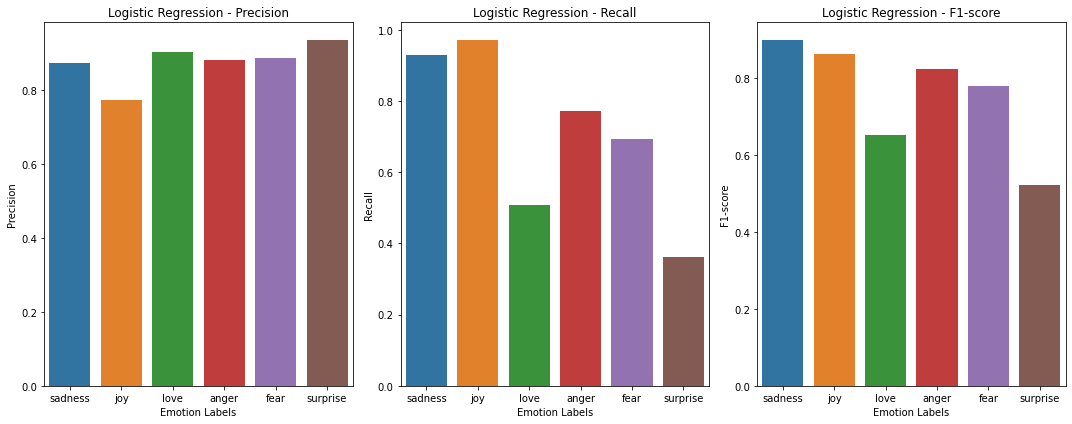

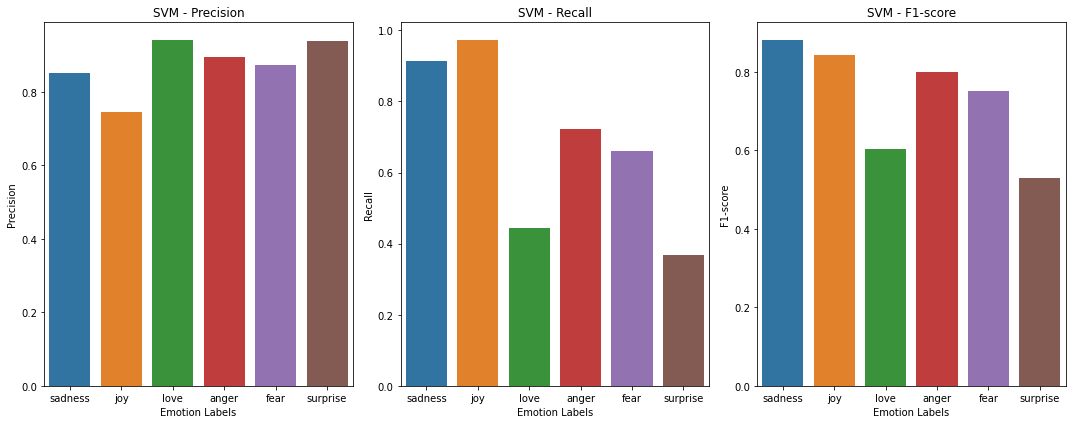

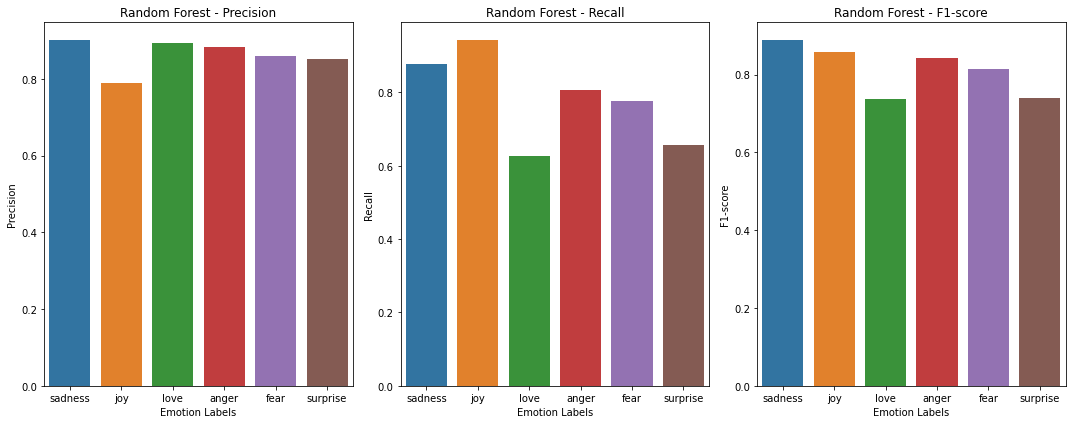

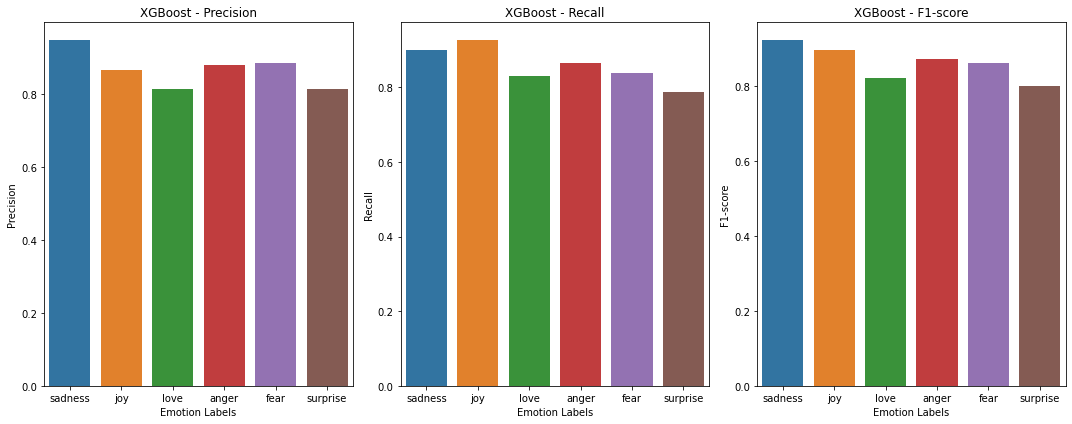

In [5]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Split the data
X = df['text']
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred_test = model.predict(X_test_tfidf)
    y_pred_train = model.predict(X_train_tfidf)
    results[model_name] = classification_report(y_test, y_pred_test, output_dict=True)

# Plotting function for bar graphs
def plot_metrics_bar(results):
    metrics = ['precision', 'recall', 'f1-score']
    emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    
    for model_name, result in results.items():
        plt.figure(figsize=(15, 6))
        
        for i, metric in enumerate(metrics):
            scores = [result[str(label)][metric] for label in range(6)]
            
            plt.subplot(1, 3, i + 1)
            sns.barplot(x=emotion_labels, y=scores)
            plt.title(f'{model_name} - {metric.capitalize()}')
            plt.xlabel('Emotion Labels')
            plt.ylabel(metric.capitalize())
        
        plt.tight_layout()
        plt.show()

# Plot bar graphs for each model
plot_metrics_bar(results)

# Input and Output Plots with Traning and Testing Accuracy for all models.

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


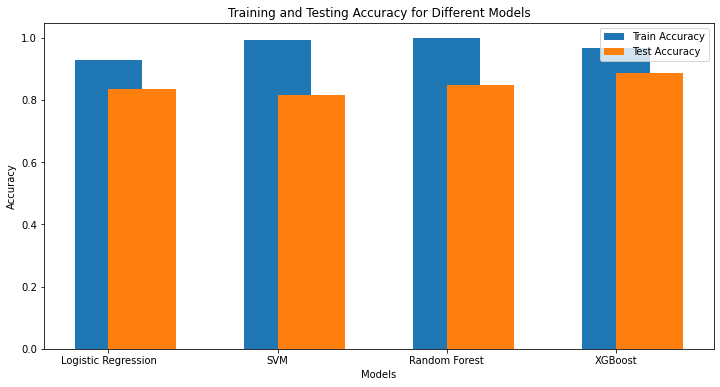

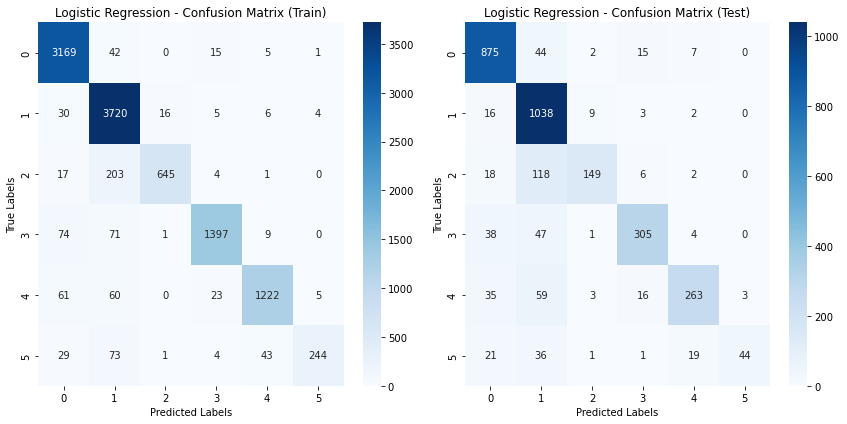

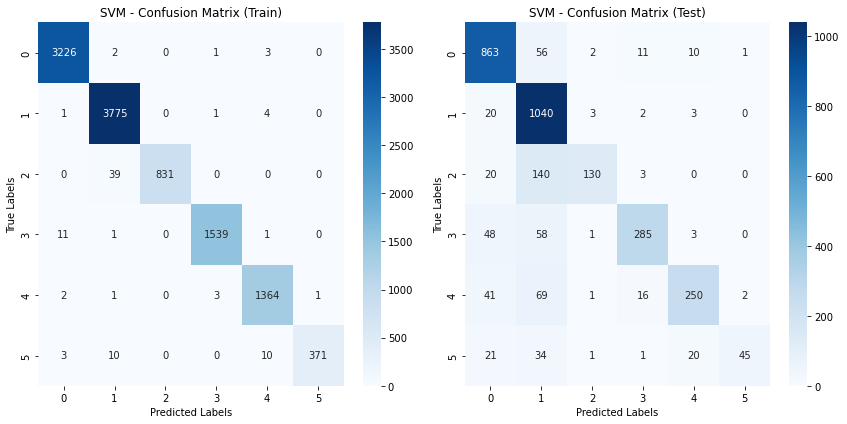

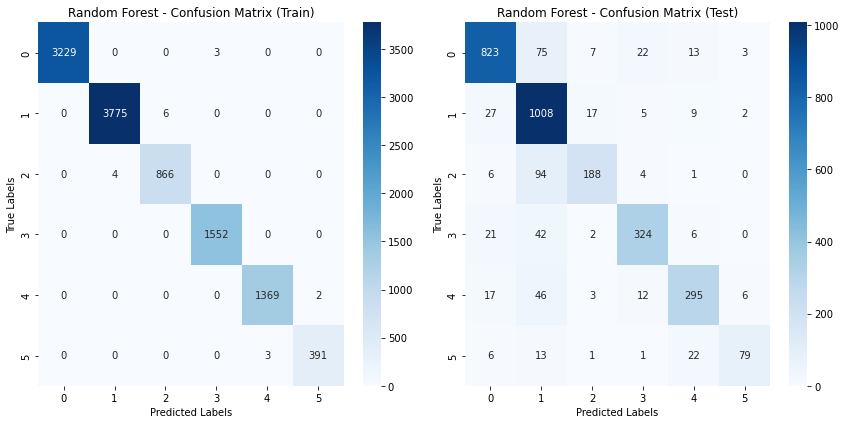

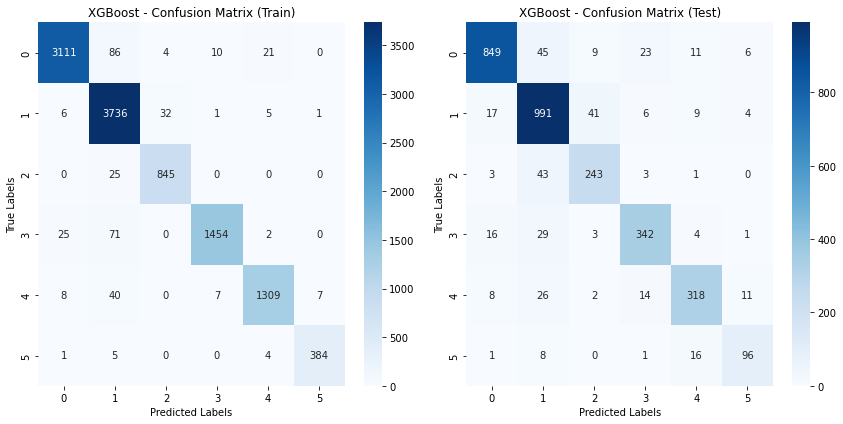

In [6]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Split the data
X = df['text']
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred_train = model.predict(X_train_tfidf)
    y_pred_test = model.predict(X_test_tfidf)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    results[model_name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'conf_matrix_train': conf_matrix_train,
        'conf_matrix_test': conf_matrix_test
    }

# Plot training and testing accuracy
def plot_accuracy(results):
    train_accuracies = [results[model]['train_accuracy'] for model in results]
    test_accuracies = [results[model]['test_accuracy'] for model in results]
    model_names = list(results.keys())
    
    x = range(len(model_names))
    
    plt.figure(figsize=(12, 6))
    
    plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
    plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy for Different Models')
    plt.xticks(x, model_names)
    plt.legend()
    plt.show()

# Plot confusion matrices
def plot_confusion_matrices(results):
    for model_name, result in results.items():
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.heatmap(result['conf_matrix_train'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} - Confusion Matrix (Train)')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        
        plt.subplot(1, 2, 2)
        sns.heatmap(result['conf_matrix_test'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} - Confusion Matrix (Test)')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        
        plt.tight_layout()
        plt.show()

# Plot accuracy and confusion matrices
plot_accuracy(results)
plot_confusion_matrices(results)

# Ploting Output for Best model

In [8]:
# Load the dataset
df = pd.read_csv('Emotions_training.csv')

# Split the data
X = df['text']
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(1/3), random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred_train = model.predict(X_train_tfidf)
    y_pred_test = model.predict(X_test_tfidf)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    results.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Print the results in tabular format
print(results_df)

# Find the best model based on testing accuracy
best_model_name = results_df.loc[results_df['Testing Accuracy'].idxmax()]['Model']
best_model_result = results_df.loc[results_df['Testing Accuracy'].idxmax()]

print(f"\nBest Model: {best_model_name}")
print(f"Training Accuracy: {best_model_result['Training Accuracy']:.4f}")
print(f"Testing Accuracy: {best_model_result['Testing Accuracy']:.4f}")

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.928304          0.835625
1                  SVM           0.991607          0.816562
2        Random Forest           0.998393          0.847500
3              XGBoost           0.967768          0.887188

Best Model: XGBoost
Training Accuracy: 0.9678
Testing Accuracy: 0.8872


# Summary 

1.Objective:-

The objective of the project was to perform text classification on a dataset containing emotional text data.

2.Dataset:-
The dataset consisted of labeled text samples categorized into different emotions like sadness, joy, love, anger, fear, and surprise.

3.Approach:-

a.)Load Dataset:- Firstly we loaded the dataset to Jupyter Notebook

b.)Data Preprocesing:- In this section we performed some data cleaning techniques like (Coverting the data into lowercase format 
Removing null values and alpha numeric characters , Stemming , Lematization etc.) to sort the data in an apropiate manner , 
we cleaned the data , so that it should be easy and more convinent to perform future operations on the cleaned data.

c.)Dividing the Dataset:- After Cleaning part we have divided the dataset  Train (70%), Test (20%) and Validation (10%) datasets.

d.)Building Diffrent Models:- After dividing the data we build diffrent models like Logistic Regression , Support Vector Machine 
Random Forest , Xgboost models, also we plotted the the confusion matrix for Traning and Testing Dataset along with displaying 
the Traning and Testing Accuracy for every model and also performed the hyparparameter tuning .

e.)Plotting Graphs for precision, recall, and f1-score :- Then we Plotted the bar graphs comparing precision, recall, 
and f1-score for each model across different emotion labels.

f.)Plotting Input and Output plots Along with Plotting Graph for Testing and Traning Acurracy :- Here in this step we firstly 
plotted the graph for comparison between Traning and Testing accuray for every model that we built following we displyed 
the confusion matrix for the every model.

g.)Plotting the Best Model:- Lastly we compared Traning and Testing Accuracy for all the models displayed them in the tabluar
format along with displaying the best model .
